# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

# Generate a dictionary of datatypes
dtype_dict = {
    'Year': 'int64',
    'Month': 'int64',
    'DayofMonth': 'int64',
    'DayOfWeek': 'int64',
    'Carrier': 'str',
    'OriginAirportID': 'int64',
    'OriginAirportName':  'str',
    'OriginCity': 'str',
    'OriginState': 'str',
    'DestAirportID': 'int64',
    'DestAirportName': 'str',
    'DestCity': 'str',
    'DestState': 'str',
    'CRSDepTime': 'int64',
    'DepDelay': 'int64',
    'DepDel15': 'float64',
    'CRSArrTime': 'int64',
    'ArrDelay': 'int64',
    'ArrDel15': 'int64'
}

df_flights = pd.read_csv('data/flights.csv', dtype=dtype_dict)
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

## Helper Functions

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function that we can re-use to check the distribution of data in a column
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Create a function that we can re-use to check the density of data in a column using seaborn
def show_density_sns(var_data):
    '''
    This function will make a density plot and display it
    '''

    # Create a figure for 1 subplot
    fig, ax = plt.subplots(1, 1, figsize = (10,4))

    # Plot the density plot
    sns.kdeplot(var_data, ax=ax, fill=True)

    # Add a title to the Figure
    fig.suptitle('Data Density')

    # Show the figure
    fig.show()

# Create a function that we can re-use to check the density of data in a column using matplotlib
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()



Identify any null or missing data, and impute appropriate replacement values.

In [3]:
# Your code to explore the data
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

In [4]:
df_flights.isnull().sum()
#df_flights[df_flights['DepDel15'].isnull()]

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [5]:
#Replace null values in DepDel15 with 0 and 1 based on DepDelay
df_flights.loc[df_flights['DepDelay'] <= 15, 'DepDel15'] = df_flights.loc[df_flights['DepDelay'] <= 15, 'DepDel15'].fillna(0)
df_flights.loc[df_flights['DepDelay'] > 15, 'DepDel15'] = df_flights.loc[df_flights['DepDelay'] > 15, 'DepDel15'].fillna(1)

#Convert DepDel15 to int
df_flights['DepDel15'] = df_flights['DepDel15'].astype(int)

#Check if the null values are replaced
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.

In [6]:
df_flights[['DepDelay','ArrDelay']].describe()

,DepDelay,ArrDelay
count,271940.000000,271940.000000
mean,10.350449,6.496650
std,35.673710,38.230331
min,-63.000000,-75.000000
25%,-4.000000,-11.000000
50%,-1.000000,-3.000000
75%,9.000000,10.000000
max,1425.000000,1440.000000


In [7]:
quartiles = df_flights['DepDelay'].quantile([0.9, 0.95, 0.99, 0.995])

# Display the quartiles
print(quartiles)

0.900     37.0
0.950     70.0
0.990    166.0
0.995    214.0
Name: DepDelay, dtype: float64


In [8]:
quartiles = df_flights['ArrDelay'].quantile([0.9, 0.95, 0.99, 0.995])

# Display the quartiles
print(quartiles)

0.900     38.0
0.950     71.0
0.990    169.0
0.995    216.0
Name: ArrDelay, dtype: float64


Minimum:-63.00
Mean:8.90
Median:-1.00
Mode:-3.00
Maximum:213.00



C:\Users\lfqh\AppData\Local\Temp\ipykernel_24692\698673881.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


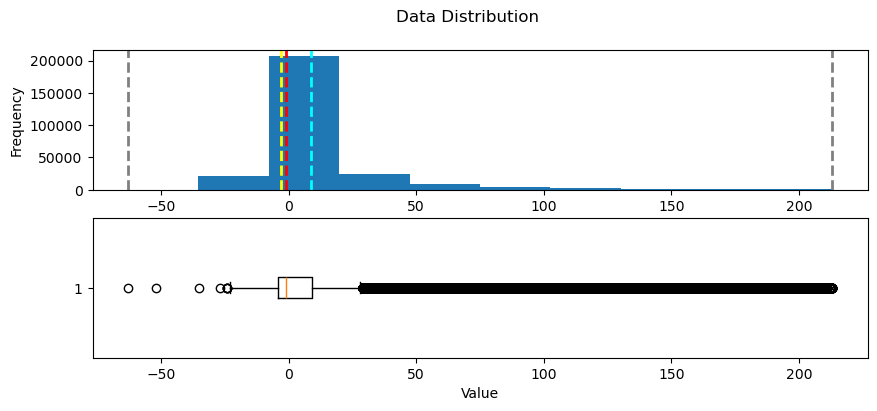

In [9]:
# calculate the 0.01th percentile
Dep_q995 = df_flights.DepDelay.quantile(0.995)
# Get the variable to examine
col = df_flights[df_flights.DepDelay < Dep_q995]['DepDelay']

show_distribution(col)

Minimum:-75.00
Mean:5.02
Median:-3.00
Mode:0.00
Maximum:215.00



C:\Users\lfqh\AppData\Local\Temp\ipykernel_24692\698673881.py:45: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


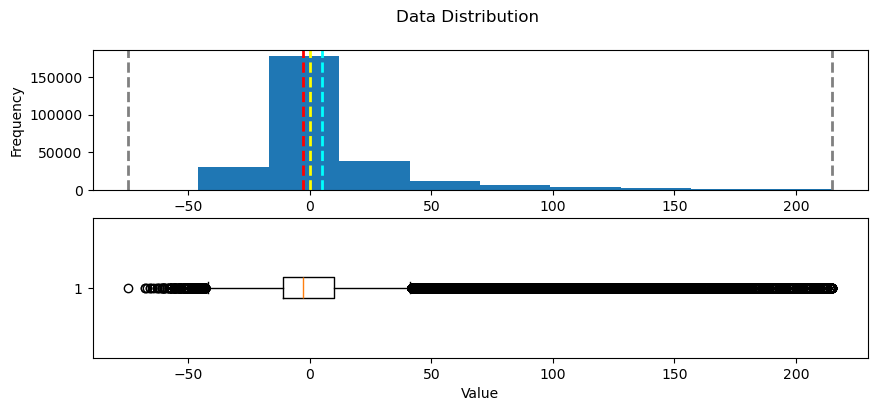

In [10]:
# calculate the 0.01th percentile
Arr_q995 = df_flights.ArrDelay.quantile(0.995)
# Get the variable to examine
col = df_flights[df_flights.ArrDelay < Arr_q995]['ArrDelay']

show_distribution(col)

In [11]:
df_flights_filtered = df_flights.query('DepDelay < @Dep_q995')
df_flights_filtered = df_flights_filtered.query('ArrDelay < @Arr_q995')
df_flights_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270420 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Year               270420 non-null  int64 
 1   Month              270420 non-null  int64 
 2   DayofMonth         270420 non-null  int64 
 3   DayOfWeek          270420 non-null  int64 
 4   Carrier            270420 non-null  object
 5   OriginAirportID    270420 non-null  int64 
 6   OriginAirportName  270420 non-null  object
 7   OriginCity         270420 non-null  object
 8   OriginState        270420 non-null  object
 9   DestAirportID      270420 non-null  int64 
 10  DestAirportName    270420 non-null  object
 11  DestCity           270420 non-null  object
 12  DestState          270420 non-null  object
 13  CRSDepTime         270420 non-null  int64 
 14  DepDelay           270420 non-null  int64 
 15  DepDel15           270420 non-null  int32 
 16  CRSArrTime         270420

View summary statistics for the numeric fields in the dataset.

In [12]:
df_flights_filtered.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,270420.0,270420.000000,270420.000000,270420.000000,270420.000000,270420.000000,270420.000000,270420.000000,270420.000000,270420.000000,270420.000000,270420.000000,270420.000000
mean,2013.0,6.981758,15.810809,3.899467,12745.134324,12739.925767,1324.738344,8.795670,0.194590,1504.598713,4.913398,0.211523,0.010750
std,0.0,1.983113,8.802055,1.987918,1501.530324,1502.859436,470.886994,27.573609,0.395885,493.241472,30.576939,0.408389,0.103123
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1527.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1723.000000,9.000000,0.000000,1917.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,213.000000,1.000000,2359.000000,215.000000,1.000000,1.000000


*What are the average (mean) departure and arrival delays?*

In [13]:
print("Average Departure Delay {:.2f}".format(df_flights_filtered['DepDelay'].mean()))
print("Average Arrival Delay {:.2f}".format(df_flights_filtered['ArrDelay'].mean()))


Average Departure Delay 8.80
Average Arrival Delay 4.91


*How do the carriers compare in terms of arrival delay performance?*

Carrier
9E     3.130232
AA     5.023148
AS    -0.605953
B6     7.758772
DL     0.705895
EV     7.709548
F9     9.515083
FL     6.012221
HA    -0.950267
MQ    10.572204
OO     5.115184
UA     2.940121
US     3.127627
VX     7.130918
WN     7.142587
YV     6.614351
Name: ArrDelay, dtype: float64


<Axes: title={'center': 'Average Arrival Delay by Carrier'}, xlabel='Carrier'>

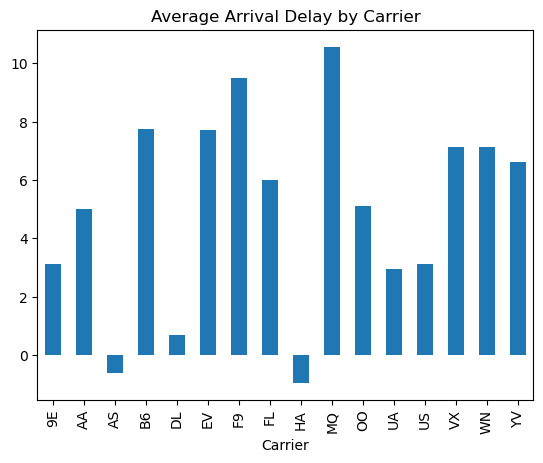

In [14]:
print(df_flights_filtered.groupby(df_flights_filtered.Carrier)['ArrDelay'].mean())
ArrDelay_by_carrier = df_flights_filtered.groupby(df_flights_filtered.Carrier)['ArrDelay'].mean()
ArrDelay_by_carrier.plot(kind='bar', title='Average Arrival Delay by Carrier')

*Is there a noticable difference in arrival delays for different days of the week?*

DayOfWeek
1    5.309265
2    3.032199
3    5.173134
4    8.529588
5    6.780811
6    1.019164
7    3.616125
Name: ArrDelay, dtype: float64


<Axes: title={'center': 'Average Arrival Delay by Day of Week'}, xlabel='DayOfWeek'>

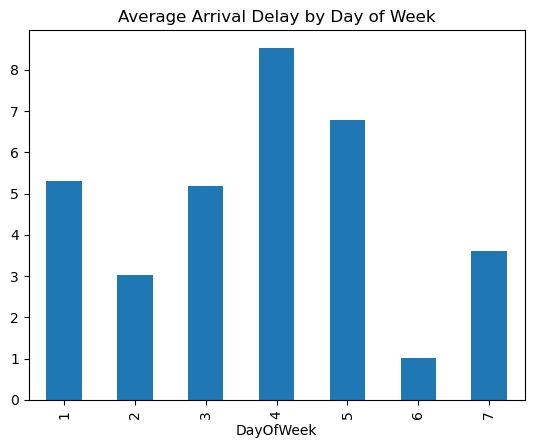

In [15]:
print(df_flights_filtered.groupby(df_flights_filtered.DayOfWeek)['ArrDelay'].mean())
ArrDelay_by_day_of_week = df_flights_filtered.groupby(df_flights_filtered.DayOfWeek)['ArrDelay'].mean()
ArrDelay_by_day_of_week.plot(kind='bar', title='Average Arrival Delay by Day of Week')

*Which departure airport has the highest average departure delay?*

In [16]:
#print(df_flights_filtered.groupby(df_flights_filtered.OriginAirportName)['DepDelay'].mean())
DepDelay_by_Origin = df_flights_filtered.groupby(df_flights_filtered.OriginAirportName)['DepDelay'].mean()
DepDelay_by_Origin_df = DepDelay_by_Origin.to_frame()
DepDelay_by_Origin_df.reset_index(inplace=True)
DepDelay_by_Origin.columns = ['OriginAirportName', 'DepDelay']

# Find the index of the row with the maximum value in the 'DepDelay' column
max_depdelay_index = DepDelay_by_Origin_df['DepDelay'].idxmax()

# Retrieve the row with the maximum value in the 'DepDelay' column
row_with_max_depdelay = DepDelay_by_Origin_df.loc[max_depdelay_index]

# Display the row
print(row_with_max_depdelay)

OriginAirportName    Chicago Midway International
DepDelay                                14.499594
Name: 7, dtype: object


*Do **late** departures tend to result in longer arrival delays than on-time departures?*

<Axes: title={'center': 'ArrDelay'}, xlabel='DepDel15'>

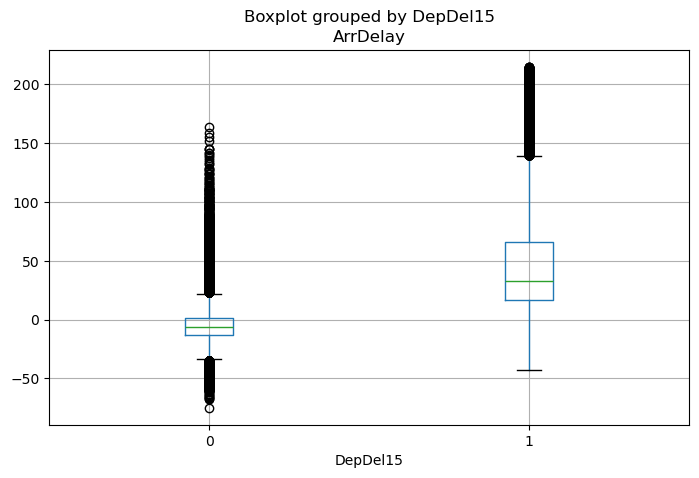

In [22]:
df_flights_filtered.boxplot(column='ArrDelay', by='DepDel15', figsize=(8,5))

*Which route (from origin airport to destination airport) has the most **late** arrivals?*

In [27]:
# Group by 'OriginAirportName' and 'DestAirportName' and count the occurrences
df_flights_late_arrivals = df_flights_filtered.query('ArrDel15 == 1')
grouped_counts = df_flights_late_arrivals.groupby(['OriginAirportName', 'DestAirportName']).size().reset_index(name='FlightCount')


# Sort the DataFrame by 'FlightCount' in descending order
sorted_grouped_counts = grouped_counts.sort_values(by='FlightCount', ascending=False)

# Display the grouped and counted DataFrame
sorted_grouped_counts.head(1)

,OriginAirportName,DestAirportName,FlightCount
1172,Los Angeles International,San Francisco International,316


*Which route has the highest average arrival delay?*

In [31]:
df_flights_arrival_delayed = df_flights_filtered.query('ArrDelay > 0')
grouped_averages = df_flights_arrival_delayed.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean().reset_index(name='AvgArrDelay')
sorted_grouped_averages = grouped_averages.sort_values(by='AvgArrDelay', ascending=False)

sorted_grouped_averages.head(10)

,OriginAirportName,DestAirportName,AvgArrDelay
2372,Washington Dulles International,Louis Armstrong New Orleans International,114.800000
2321,Theodore Francis Green State,Cleveland-Hopkins International,111.000000
341,Cincinnati/Northern Kentucky International,LaGuardia,101.000000
133,Bradley International,Newark Liberty International,87.285714
1593,Norfolk International,Minneapolis-St Paul International,86.900000
89,Baltimore/Washington International Thurgood Ma...,Newark Liberty International,86.000000
2068,Salt Lake City International,Washington Dulles International,83.000000
1595,Norfolk International,Newark Liberty International,80.133333
2320,Theodore Francis Green State,Chicago O'Hare International,79.500000
1028,LaGuardia,Richmond International,75.875000
